  
         Potential : V(x) = 16*(1.-exp(-2*x))**2   (Morse L=0)   
  
 E_in = 0.0000  dE =  0.01  h =  0.006  dim =  1003
  
  ****************   Eigenvalue  # 1   ***************** 
 imatch =  171  xmatch = 0.016  V(xmatch) = 0.01587  E = 0.0100
 imatch =  175  xmatch = 0.040  V(xmatch) = 0.09458  E = 0.0820
 imatch =  177  xmatch = 0.052  V(xmatch) = 0.15610  E = 0.1540
 imatch =  179  xmatch = 0.064  V(xmatch) = 0.23096  E = 0.2260
 imatch =  181  xmatch = 0.076  V(xmatch) = 0.31815  E = 0.2980
 imatch =  183  xmatch = 0.088  V(xmatch) = 0.41671  E = 0.3700
 imatch =  184  xmatch = 0.094  V(xmatch) = 0.46997  E = 0.4420
 imatch =  185  xmatch = 0.100  V(xmatch) = 0.52574  E = 0.5140
 imatch =  187  xmatch = 0.112  V(xmatch) = 0.64439  E = 0.5860
 imatch =  188  xmatch = 0.118  V(xmatch) = 0.70707  E = 0.6580
 imatch =  189  xmatch = 0.124  V(xmatch) = 0.77187  E = 0.7300
 imatch =  190  xmatch = 0.130  V(xmatch) = 0.83868  E = 0.8020
 imatch =  191  xmatch = 0.136  V(xmatch) = 0.9

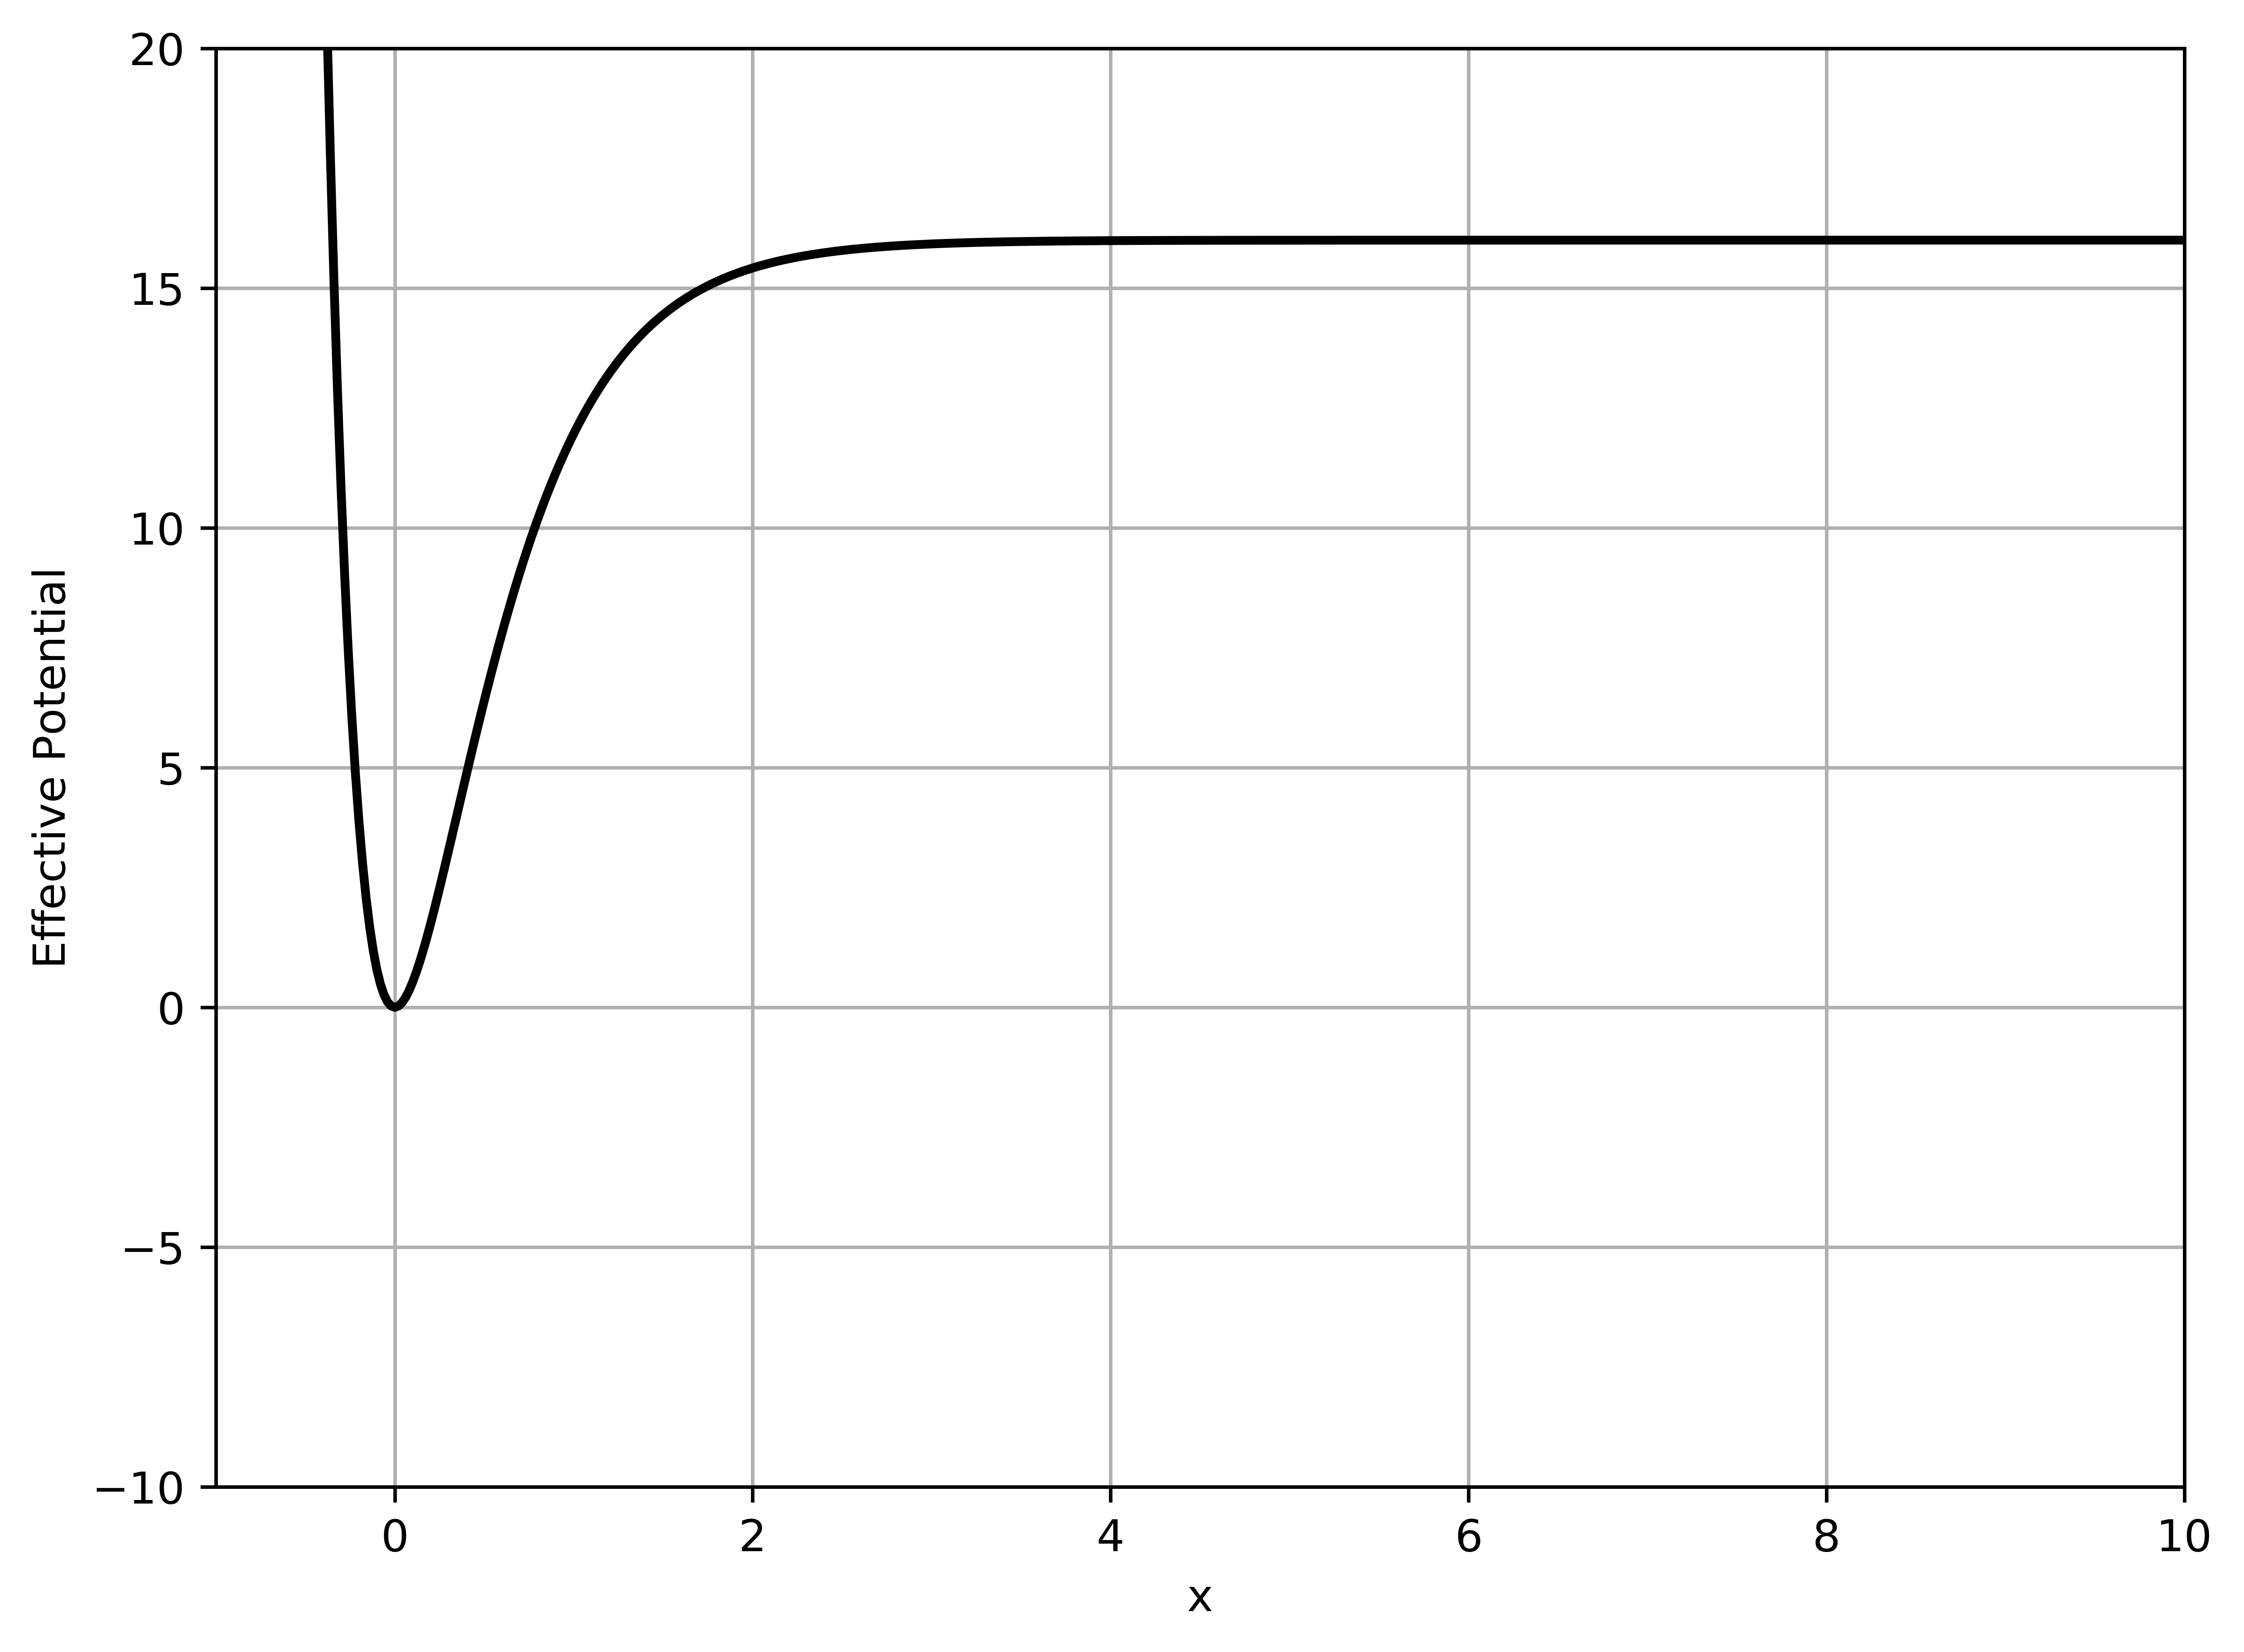

 
                        Eigenfunctions (normalized amplitude)


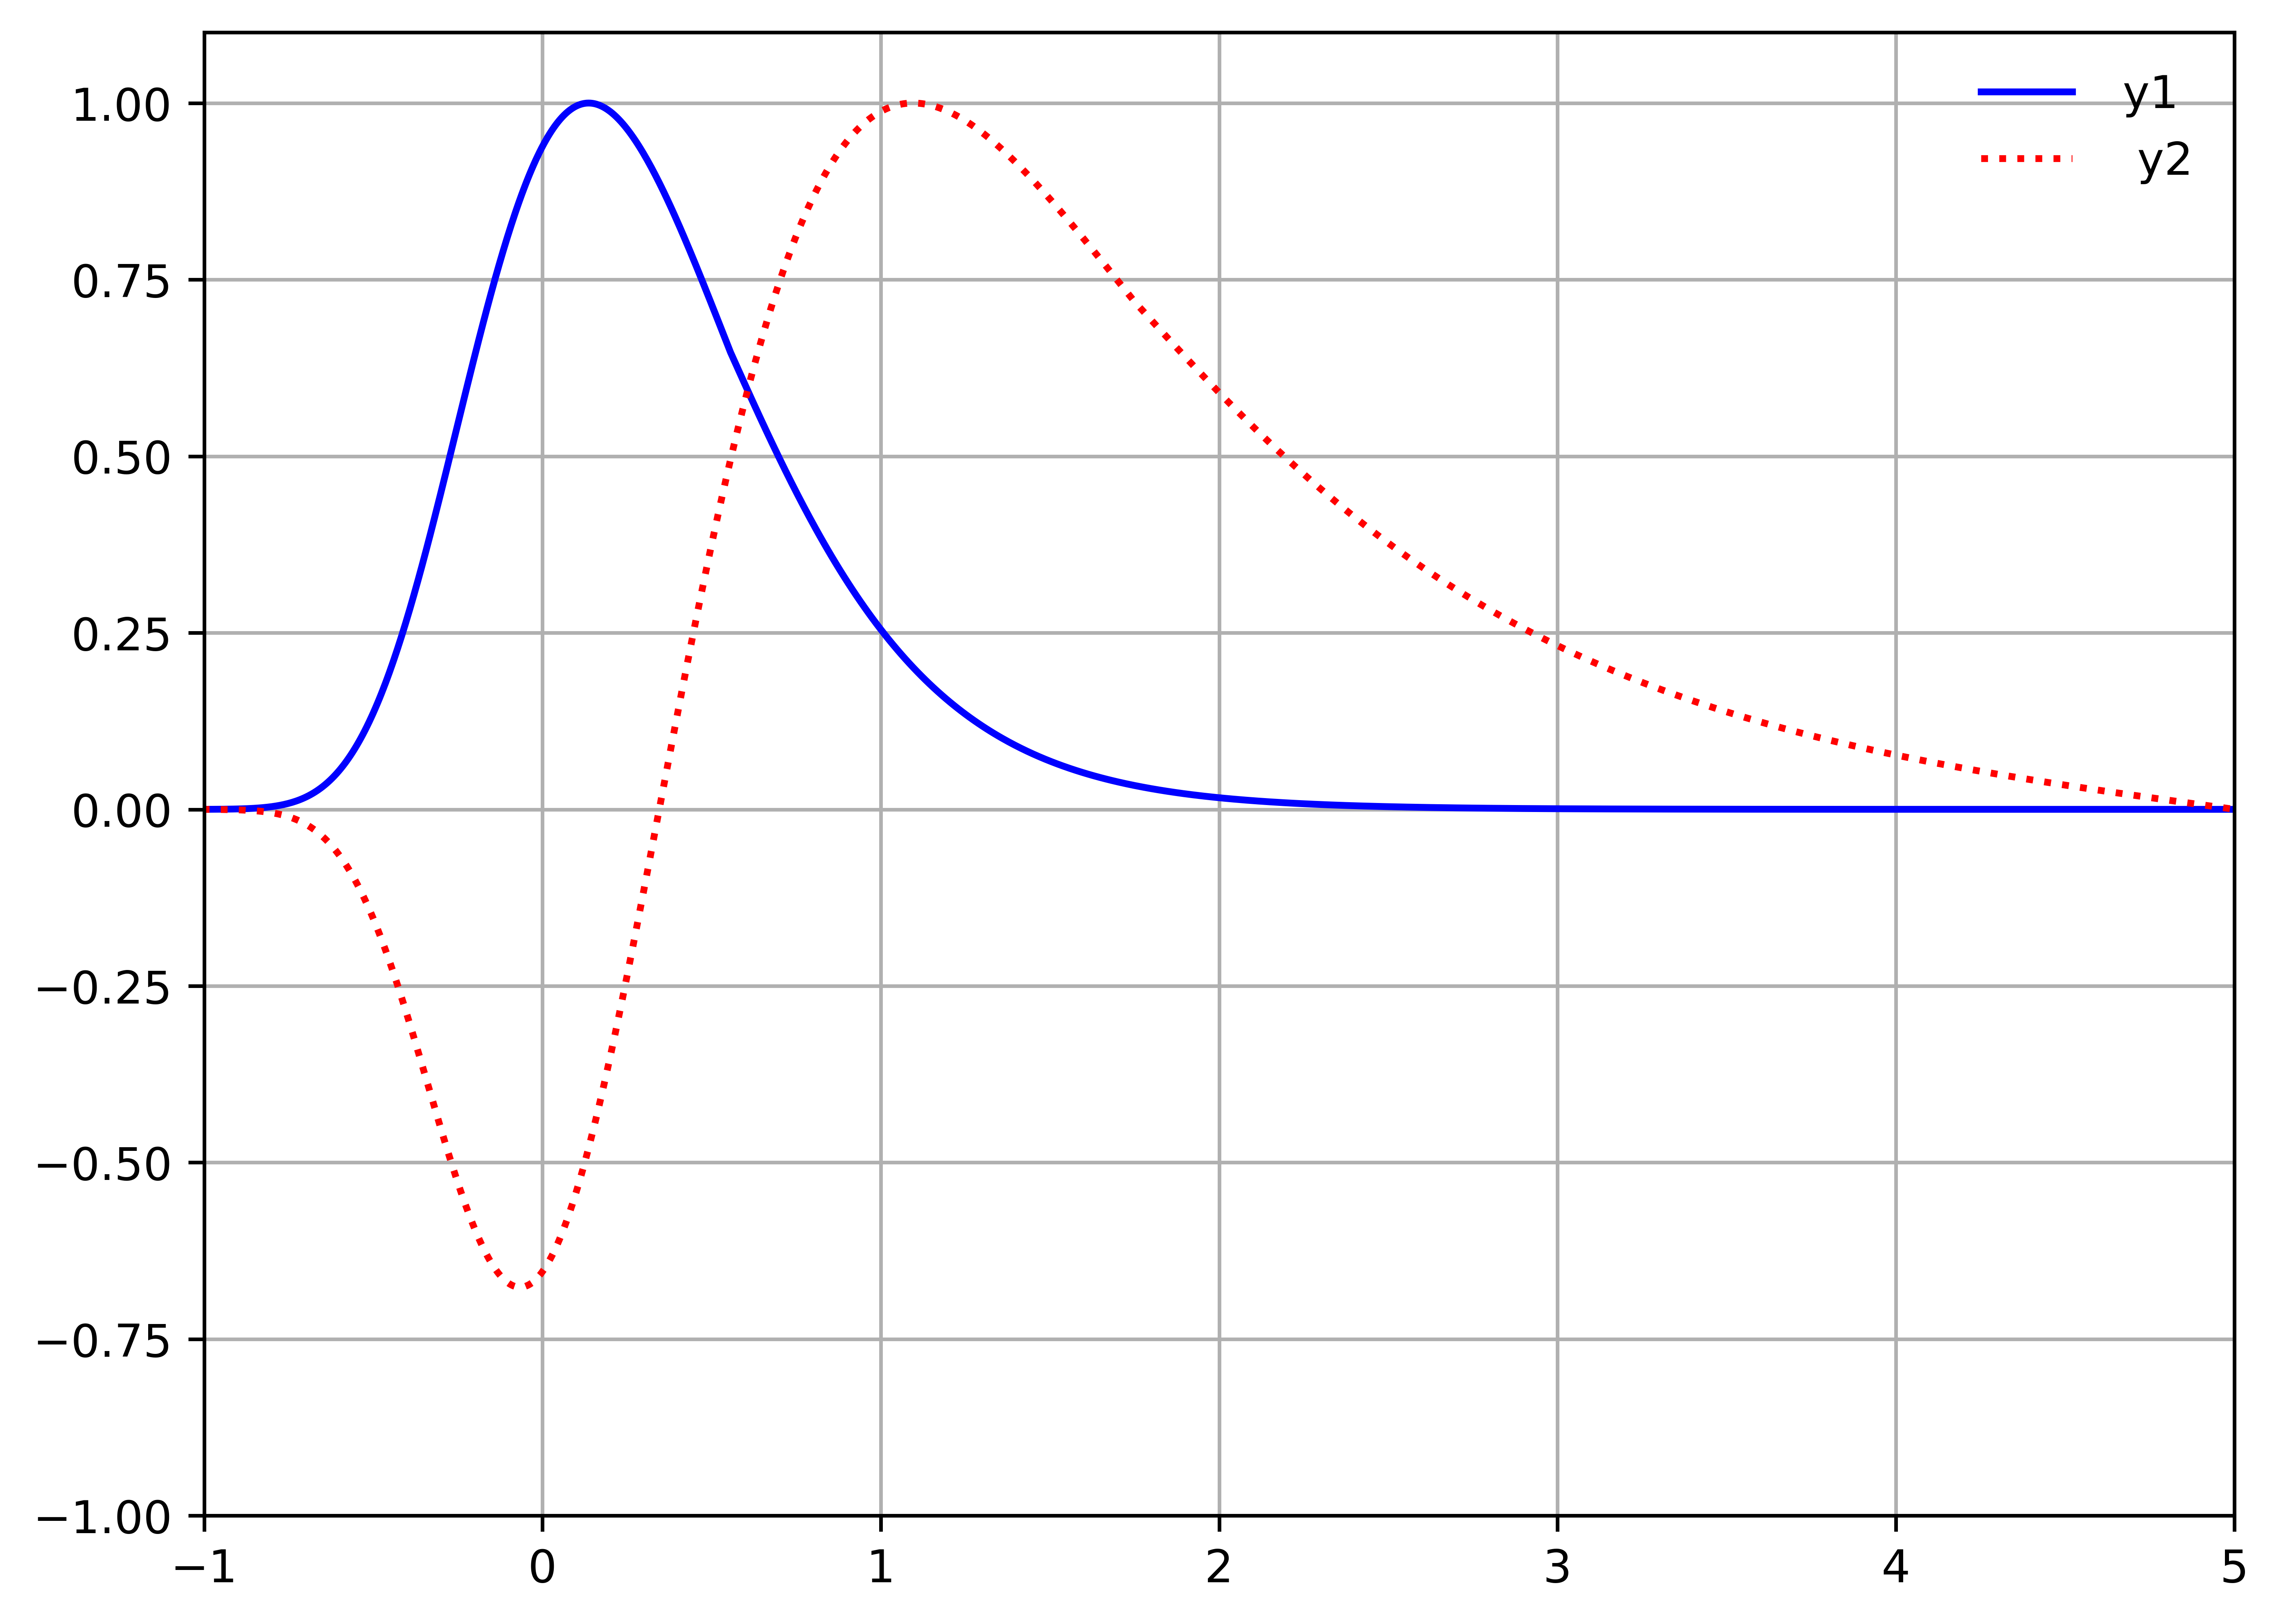

  
  probability normalization 
 efic1 = 0.120   I1 = 0.723   eI1 = 0.020
 efic2 = 0.235   I2 = 1.413   eI2 = 0.026
  
  checking probability 
 efic1 = 0.121   I1 = 1.011   eI1 = 0.027
 efic2 = 0.239   I2 = 1.017   eI2 = 0.018


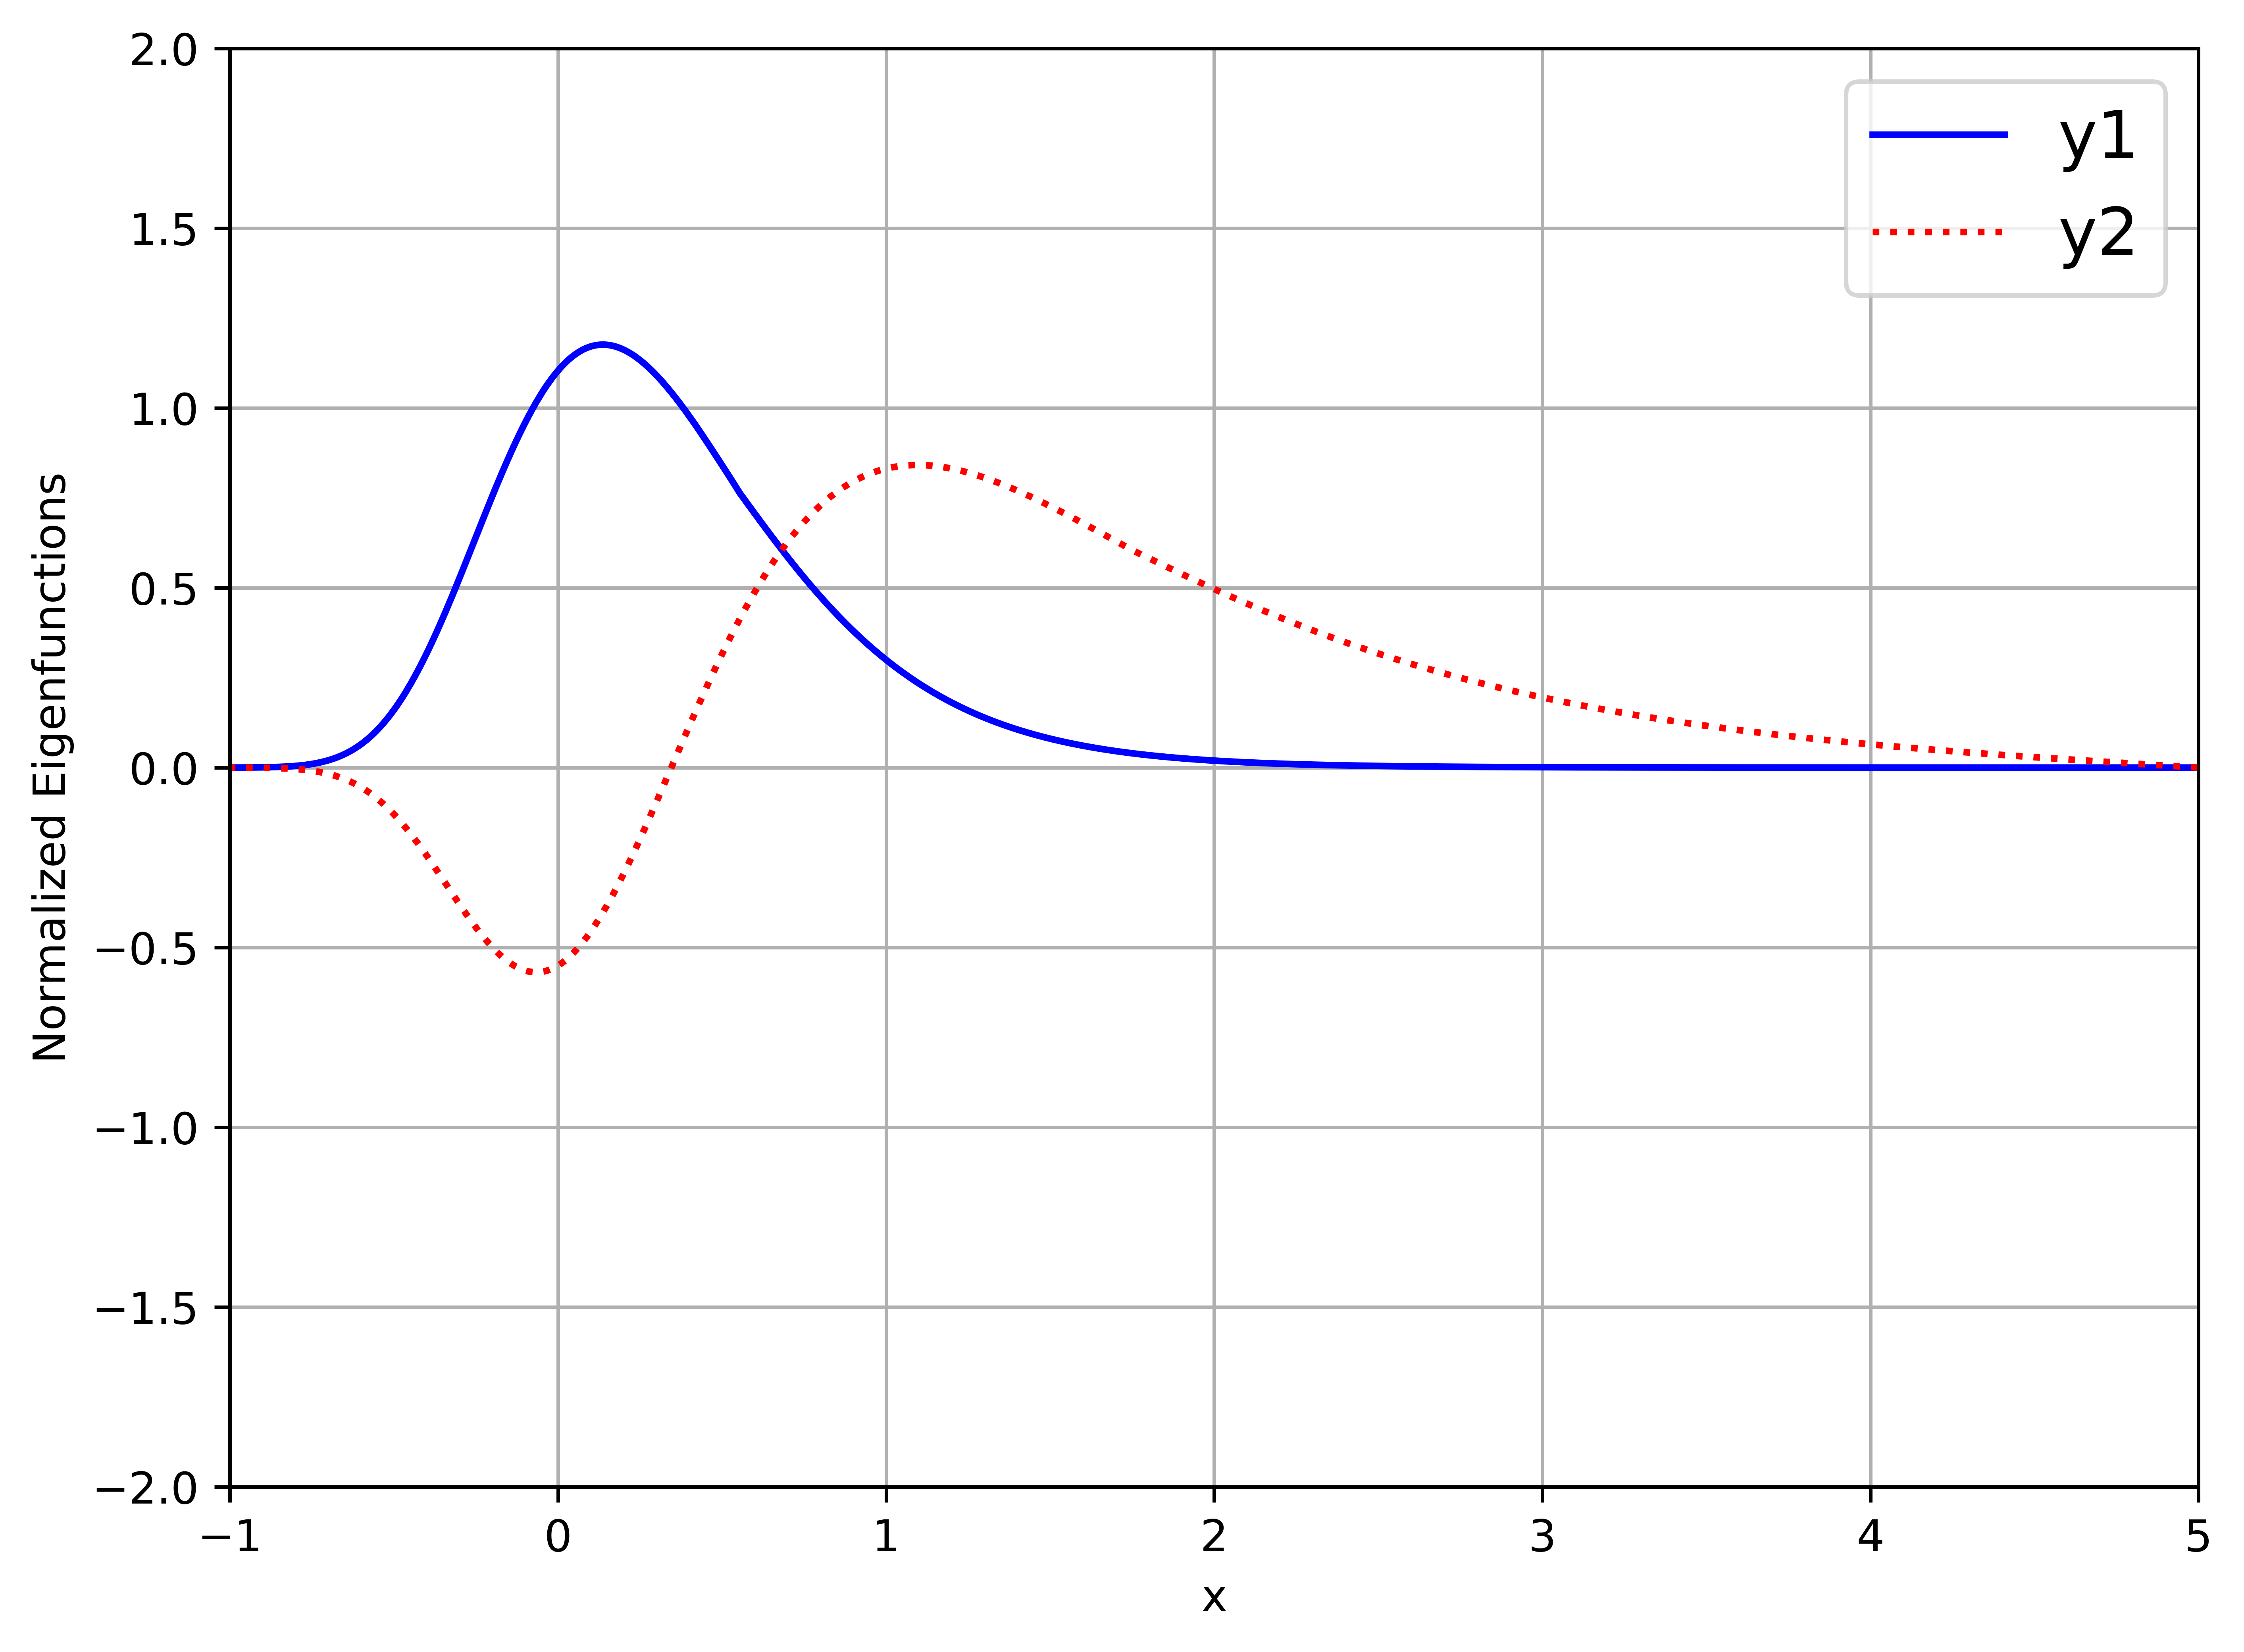

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from random import random

x = np.linspace(-10,10,1001)

def  V(x):                          
     Vx=16*(1.-np.exp(-2*x))**2     #effective potential  
     return  Vx

def vec_max(dim,x):                #left maximum
    xmax=0
    N=dim
    for j in range(int(N)):
        if j<int(N) and abs(x[j])>xmax:
           xmax=abs(x[j])
        else:
           continue
    return xmax

def nrovl(y0, y1, x0, E, h, iflag):  #left solution
    q0 = (E-V(x0))
    q1 = (E-V(x0+h))
    q2 = (E-V(x0+h+h))
    p0 = (1 + h*h*q0/12)
    p1 = 2*(1 - 5*h*h*q1/12)
    p2 = 1 + h*h*q2/12
    y2 = (p1*y1-p0*y0)/p2
    if iflag<1:
        print(" x0 = ", x0," y0 = ", y0," V = ",V(x0))
        print(" x1 = ", x0+h," y1 = ",y1," V = ",V(x0+h),
        " y2 = ",y2)
    return y2


def  nrovr(y0, y1, x0, E, h, iflag):  #right solution
     q0  =  (E-V(x0))
     q1  =  (E-V(x0-h))
     q2  =  (E-V(x0-h-h))
     p0  =  (1 + h*h*q0/12)
     p1   =   2*(1 - 5*h*h*q1/12)
     p2   =   1 + h*h*q2/12
     y2   =  (p1*y1-p0*y0)/p2
     if iflag<1:
        print(" x_100 = ", x0," y0_100 = ", y0," V = ",V(x0))
        print(" x_99 = ", x0-h," y_99 = ",y1," V = ",V(x0-h)," y_98 = ",y2)
     return  y2

def espectro(xl,xu,h,delta,eps,dim,nmax,kmax,Ein,Vmax,dE,iflag):
	
    xx=list(range(dim));     yy=list(range(dim));     
    yl=list(range(dim));     yr=list(range(dim))
    ee=list(range(nmax));    ff=list(range(nmax));    ff2=list(range(nmax))
    yy1=list(range(dim));    yy2=list(range(dim));    yy3=list(range(dim))
    nk=list(range(nmax))
    E_old = Ein;   E = Ein + dE
    
    
    # here yy1, yy2 and yy3 represent the three wave functions that the
    #code wants to find, if you want to find more solutions you must add 
    #new parameters in the code
    
    for m in range(nmax):
       print("  ****************   Eigenvalue  #",m+1,"  ***************** ")

       
       f_old=0

       for k in range(kmax): #iteration for candidate eigenvalue
           #print("  ****************   Iteration (for candidate)  =  ",k,"  ***************** ")
           imatch=0

           for j in range(dim-1):  #classical right turning point
               xx[0]=xl;          xx[dim-1]=xu
               DE1 = E - V(xx[j])
               xx[j+1] = xx[j]+h
               DE2 = E - V(xx[j+1])
               D1D2=DE1*DE2
               if D1D2<=0  and DE1 > 0:  #match point
                  imatch = j+1
                  print(" imatch = ",imatch," xmatch = %2.3f" %(xx[imatch])," V(xmatch) = %2.5f" %(V(xx[imatch]))," E = %2.4f" %(E))

           xmatch=xx[imatch]
           ii=range(imatch+2)
           i_lim = ii[2:imatch+2]

           xx[0]=xl;  xx[1]=xl+h   #initial values
           yy[0]=0;   yy[1] = delta
           #vv[0]=0;   vv[1] = delta

           for i in i_lim:                                      #numerov left solution
               yy[i]=nrovl(yy[i-2],yy[i-1],xx[i-2],E,h,iflag)
               xx[i]= xx[i-1]+h

           jjj=list(range(dim+1))
           j_lim = list(jjj[imatch-1:dim+1])
           comp_j=len(j_lim)
           jj=sorted(j_lim,key=abs,reverse=True)

           for i in range(dim):
               if i<=imatch+1:
                  yl[i]=yy[i]
               if i>imatch+1:
                  yl[i]=0

           for i in jj:                                         #numerov right solution
               if i==dim:
                   yr[dim-1]=0
               if i==(dim-2):
                   yr[dim-2]=2*delta
               if i<(dim-2):
                   yr[i]=nrovr(yr[i+2],yr[i+1],xx[i+2],E,h,iflag)
                   xx[i]= xx[i+1]-h

           for i in range(imatch-1):
               yr[i]=0

           ymatch=yy[imatch]
           yrmatch=yr[imatch]
           ylmatch=yl[imatch]
           #print("  ")
           #print(" imatch =",imatch," xmatch =",xx[imatch]," ylmatch =",ylmatch," yrmatch =",yrmatch)

           if ymatch != 0:
               scale=yrmatch/ymatch
           else:
               continue

           for t in range(imatch+1):    #  y_left
               yy[t] = yy[t]*scale
               yl[t] = -yl[t]*scale
           yl[imatch+1]=-yl[imatch+1]*scale
           #print(" imatch =",imatch," xmatch =",xx[imatch]," ylmatch =",yy[imatch]," yrmatch =",yrmatch)
           ymatch=yy[imatch]
           dlmatch=yy[imatch+1]*scale-yy[imatch-1]                  # dif1_left

           t_lim=list(range(dim+1))
           tt=list(t_lim[imatch+1:dim])

           drmatch=yr[imatch+1]-yr[imatch-1]                        # dif1_right

           f =(dlmatch-drmatch)/(2*h)

           for t in tt:                   #  y_right
               yy[t] = yr[t]

           #print(" # iteracoes =",nk[m],"  dl =",dlmatch,"  dr =",drmatch,"  f_old = %2.1e   f = %2.1e   f2 = %2.1e" %(f_old,f,f2))

           #eps=0.0001

           delta_E=-f*(E-E_old)/(f-f_old)
           #print(" k = %2d   E_old = %2.3f    Eingen = %2.3f   f_old = %2.3e   f = %2.3e  (E_next-Eingen) = %2.3e" %(k,E_old,E,f_old,f,delta_E))

           if abs(delta_E)<eps:  # determination of the root (energy) of f(E) by the secant method
              ee[m] = E
              nk[m] = k
              ff[m] = f
              k = kmax
              break
           else:
              f_old=f;  E_old=E;   E = E + 7.2*dE

       if m==0:
       	  E = E + 70*dE
          for j in range(dim):
              yy1[j]=yy[j]
       if m==1:
          E = E + dE/10
          for j in range(dim):
              yy2[j]=yy[j]
       if m>=2:
          E = E_old + 50*dE
          for j in range(dim):
              yy3[j]=yy[j]
       print(" k = %2d   E_old = %2.3f    Eingen = %2.3f   f_old = %2.3e   f = %2.3e   delta_E = %2.3e" %(nk[m],E_old,ee[m],f_old,f,delta_E))
       print()

    return ee, xx, yy1, yy2, yy3

#==========================================================================

a=-1.01; b= 5.01; h=0.006
xl=a; xu=b; D = xu-xl
delta = 0.01; eps = 0.00001
dim=int(D/h); kmax=100; nmax=2
n =0; iflag=0
Rydberg=13.605693122994

x0=xl; y0=0. ; y1=delta; iflag=1
nrovl(y0,y1,x0,0,h,iflag)
nrovr(y0,y1,xu,0,h,iflag)

dE = delta
#Ein = -4
#Ein = -1.6
#Ein = -5.2
Ein = 0.0
Vmax= 16.

print(" ==========================================================================")
print("  ")
print("         Potential : V(x) = 16*(1.-exp(-2*x))**2   (Morse L=0)   ")
print("  ")
print(" ==========================================================================")

print(" E_in = %2.4f" %(Ein)," dE = ",dE," h = ",h," dim = ",dim)
print("  ")



ee,xx,yy1,yy2,yy3=espectro(xl,xu,h,delta,eps,dim,nmax,kmax,Ein,Vmax,dE,iflag)

A=1.                     # amplitude normalization in 1 unit
ymax1=vec_max(dim,yy1);   ymax2=vec_max(dim,yy2);   ymax3=vec_max(dim,yy3)

for i in range(dim):     # amplitude normalization
    yy1[i] = yy1[i]/ymax1;  yy2[i] = yy2[i]/ymax2;   yy3[i] = yy3[i]/ymax3

colors =['b','r','g','c','m','y','k'];    #color list (blue, red, green, cyan, yellow, magenta and black)
    
plt.figure(figsize=(8, 6), dpi=800) 
plt.plot(x,V(x),color=colors[6],linewidth=2)
plt.ylim(-10,20)
plt.xlim(-1,10)
plt.xlabel('x')
plt.ylabel('Effective Potential')
plt.grid()
plt.show()


print(" ")
print(" %60s" %('Eigenfunctions (normalized amplitude)'))
plt.figure(figsize=(8, 6), dpi=800) 
plt.plot(xx,yy1,color=colors[0])
plt.plot(xx,yy2,':',color=colors[1])
plt.legend([' y1','  y2','  y3'],prop={"size":10},frameon=False)
plt.ylim(-1,1.1)
plt.xlim(-1,5)
plt.grid()
plt.show()

efic=list(range(nmax));  I=list(range(nmax));   eI=list(range(nmax))

S=A*(xu-xl)                     # Born normalizatiom
l0=0; l1=0; l2=0
N=10000
for i in range(N):              # integral of y*y with the Monte Carlo method
    y = A*random()
    j=np.random.randint(dim)
    yj1=yy1[j]*yy1[j];   yj2=yy2[j]*yy2[j];   yj3=yy3[j]*yy3[j]
    if y <= yj1:
       l0 += 1
    if y <= yj2:
       l1 += 1
    if y <= yj3:
       l2 += 1

efic[0] = float(l0)/N;  efic[1] = float(l1)/N
I[0] = S*efic[0];       I[1] = S*efic[1];      
eI[0] = (S/np.sqrt(N))*np.sqrt(efic[0]*(1-efic[0]))
eI[1] = (S/np.sqrt(N))*np.sqrt(efic[1]*(1-efic[1]))


print("  ")
print("  probability normalization ")
print(" efic1 = %2.3f   I1 = %2.3f   eI1 = %2.3f" %(efic[0],I[0],eI[0]))
print(" efic2 = %2.3f   I2 = %2.3f   eI2 = %2.3f" %(efic[1],I[1],eI[1]))


for i in range(dim):                           # probability normalization
    yy1[i]=yy1[i]/np.sqrt(I[0]); yy2[i]=yy2[i]/np.sqrt(I[1])


ymax1=vec_max(dim,yy1);   ymax2=vec_max(dim,yy2)

S0=ymax1*ymax1*(xu-xl);   S1=ymax2*ymax2*(xu-xl)

l0=0;  l1=0           # checking probability
N=10000
for i in range(N):
    y1 = ymax1*ymax1*random(); y2 = ymax2*ymax2*random()
    j=np.random.randint(dim)
    yj1=yy1[j]*yy1[j];   yj2=yy2[j]*yy2[j]
    if y1<= yj1:
       l0 += 1
    if y2 <= yj2:
       l1 += 1
    

efic[0] = float(l0)/N;  efic[1] = float(l1)/N
I[0] = S0*efic[0];      I[1] = S1*efic[1]
eI[0] = (S0/np.sqrt(N))*np.sqrt(efic[0]*(1-efic[0]))
eI[1] = (S1/np.sqrt(N))*np.sqrt(efic[1]*(1-efic[1]))


print("  ")
print("  checking probability ")
print(" efic1 = %2.3f   I1 = %2.3f   eI1 = %2.3f" %(efic[0],I[0],eI[0]))
print(" efic2 = %2.3f   I2 = %2.3f   eI2 = %2.3f" %(efic[1],I[1],eI[1]))


et=[-1,-1/4,-1/9];      sig_e=[0.005,0.005,0.005]




plt.figure(figsize=(8, 6), dpi=800) 
plt.plot(xx,yy1,color=colors[0])
plt.plot(xx,yy2,':',color=colors[1])
plt.legend(['y1','y2','y3'],prop={"size":15},frameon=True)
plt.ylim(-2.,2.)
plt.xlim(-1,5)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions')
plt.grid(True)
plt.show()
